# Бизнес-кейс: Aerofit

Aerofit — ведущий бренд в области фитнес-оборудования. Aerofit предлагает ассортимент продукции, включающий беговые дорожки, велотренажеры, тренажеры и фитнес-аксессуары, чтобы удовлетворить потребности всех категорий людей.

# Бизнес-проблема

Команда по исследованию рынка в AeroFit хочет определить характеристики целевой аудитории для каждого типа беговых дорожек, предлагаемых компанией, чтобы предоставить более качественную рекомендацию новым клиентам. Команда решает исследовать, есть ли различия в продукте для разных категорий потребителей.

Проведите описательную аналитику, чтобы **создать портрет (аватар)** клиента для каждой беговой дорожки AeroFit, разработав соответствующие таблицы и диаграммы.

Для каждой модели  беговой дорожки — продукта AeroFit постройте **двусторонние таблицы** непредвиденных обстоятельств и вычислите все **условные и предельные вероятности**, сформулируйте выводы и спрогнозируйте их влияние на бизнес.

# Анализ основных показателей (метрик)

In [9]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aerofit.csv: Содержит данные о клиентах, в том числе:
- Приобретенный продукт (KP281, KP481, KP781)
- Возраст
- Пол
- Образование
- Семейное положение
- Использование (среднее еженедельное использование беговой дорожки)
- Доход
- Фитнес (самооценка)
- Мили (среднее недельное расстояние)

In [20]:
aerofit=pd.read_csv('https://raw.githubusercontent.com/aman2656/Aerofit-Case-Study/main/aerofit.csv')
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [11]:
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [12]:
aerofit.shape[0] #Число строк

180

In [13]:
aerofit.shape[1] #Число столбцов

9

In [14]:
aerofit.ndim #возвращает число измерений или осей

2

In [15]:
aerofit.info() #показывает тип данных признаков,  информацию об индексах, столбцах и занимаемом месте в памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [16]:
aerofit.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


Метод **isnull()**, где True указывает на пропущенные значения, а False указывает на непропущенные значения.

In [17]:
aerofit.isnull().any()

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False


В данных нет пропущенных значений.

In [18]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000



- **Возраст:** Возрастной диапазон для лиц в этой группе охватывает от минимум 18 лет до максимум 50 лет, со средним возрастом 28,79. Кроме того, 75% людей в этой группе находятся в возрасте 33 лет или моложе.

- **Образование:** большинство людей имеют 16-летнее образование, при этом около 75% населения имеют уровень образования 16 лет или меньше.

- **Использование:** среднее использование в неделю составляет 3,4, максимальное — 7, минимальное — 2.

- **Фитнес:** Средняя оценка 3,3 по шкале от 1 до 5.

- **Мили:** среднее количество миль, которое проходит клиент, составляет 103, максимальное расстояние, которое преодолевает большинство людей, составляет почти 115, а минимальное — 21.

- **Доход (в $):** большинство клиентов зарабатывает около 58 тыс. долларов в год, максимум — 104 тыс. долларов, минимум — почти 30 тыс. долларов.


# Неграфический анализ: количество значений и уникальные атрибуты

In [19]:
aerofit['Product'].unique()  #KP281, KP481, KP781 три различных продукта компании

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [21]:
aerofit['Age'].unique() # список уникальных возрастов

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [22]:
# Число клиентов разделенных по шкале оценок от 1 до 5
aerofit['Fitness'].value_counts().sort_index()

,count
Fitness,
1,2
2,26
3,97
4,24
5,31


In [23]:
unique_MaritalStatus = aerofit['MaritalStatus'].unique()
unique_MaritalStatus

array(['Single', 'Partnered'], dtype=object)

In [24]:
# Количество клиентов зависит от столбца Usage
aerofit['Usage'].value_counts().sort_index()

,count
Usage,
2,33
3,69
4,52
5,17
6,7
7,2


In [25]:
product_counts = aerofit['Product'].value_counts()
gender_counts = aerofit['Gender'].value_counts()
marital_status_counts = aerofit['MaritalStatus'].value_counts()

In [26]:
product_counts

,count
Product,
KP281,80
KP481,60
KP781,40


In [27]:
gender_counts

,count
Gender,
Male,104
Female,76


In [28]:
marital_status_counts

,count
MaritalStatus,
Partnered,107
Single,73


In [29]:
most_frequent_product = aerofit.groupby('Product')['Usage'].sum().reset_index()
most_frequent_product

,Product,Usage
0,KP281,247
1,KP481,184
2,KP781,191


Наиболее часто встречающийся продукт — **KP281** .

In [30]:
product_gender_counts = pd.crosstab(aerofit['Product'], aerofit['Gender'], margins=True)
product_gender_counts

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**Таблица сопряженности (crosstab)** по полу для каждого продукта , показывающая, сколько женщин и мужчин связано с каждым продуктом.

In [31]:
product_usage_counts = pd.crosstab(aerofit['Product'], aerofit['Usage'], margins=True)
product_usage_counts

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180




**Таблица сопряженности (crosstab)** использования по продукту , показывающая среднее количество раз, которое клиент планирует использовать отдельную беговую дорожку в неделю.

In [32]:

product_fitness_counts = pd.crosstab(aerofit['Product'], aerofit['Fitness'], margins=True)
product_fitness_counts

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


**Таблица сопряженности (crosstab)** фитнес-показателей по продуктам , показывающая каждый уровень фитнес-показателя для каждого продукта

In [33]:
fitness_usage=round(pd.crosstab(aerofit['Fitness'],aerofit['Usage'],margins=True,normalize=True) *100,2)
fitness_usage

Usage,2,3,4,5,6,7,All
Fitness,,,,,,,
1,0.56,0.56,0.00,0.00,0.00,0.00,1.11
2,7.78,5.56,1.11,0.00,0.00,0.00,14.44
3,10.00,26.11,16.67,1.11,0.00,0.00,53.89
4,0.00,5.56,3.89,3.33,0.56,0.00,13.33
5,0.00,0.56,7.22,5.00,3.33,1.11,17.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


Более 53% покупателей оценили свою физическую форму как среднюю (с рейтингом 3), и в среднем они используют продукт 3–4 раза в неделю.

In [34]:
average_income_by_product = aerofit.groupby('Product')['Income'].mean()
average_income_by_product

,Income
Product,
KP281,46418.025
KP481,48973.650
KP781,75441.575


In [35]:
gender_marital_cross_tab = pd.crosstab(aerofit['Gender'], aerofit['MaritalStatus'])
gender_marital_cross_tab

MaritalStatus,Partnered,Single
Gender,,
Female,46,30
Male,61,43


взаимосвязи между двумя категориальными переменными с помощью кросс табулицы



**Краткое содержание**

- KP281, KP481, KP781 — это 3 разных продукта
- Наиболее часто покупаемый тип беговой дорожки — KP281.
- Существует 32 уникальных возраста
- В списке клиентов 104 мужчины и 76 женщин.
- 8 уникальных наборов Образований (14, 15, 12, 13, 16, 18, 20, 21)
- Самый высокий рейтинг фитнеса — 3
- Большинство клиентов используют беговую дорожку не реже 3 дней в неделю.
- Большинство клиентов, совершивших покупку, состоят в браке/партнерстве.

**Преобразование категориальных атрибутов в «Категорию»**

In [36]:
aerofit2=aerofit.copy()
aerofit2['Age_group']=aerofit.Age

aerofit2.Age_group = pd.cut(aerofit.Age, bins=[0,20,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])
age_counts=aerofit2['Age_group'].value_counts()
age_counts

,count
Age_group,
Adult,142
Middle Aged,22
Teen,10
Elder,6



Подсчет количества лиц в каждой возрастной группе и классификация возраста по следующим категориям:

- 0-20 -> Подросток
- 21-35 -> Взрослые
- 36-45 -> Средний возраст
- 46-60 -> Пожилой возраст

In [37]:
aerofit2['Fitness_Category']=aerofit.Fitness
aerofit2['Fitness_Category'].replace({1:'Poor shape',
                                      2:'Bad shape',
                                      3:'Average shape',
                                      4:'Good shape',
                                      5:'Excelent shape'}, inplace =True)
aerofit2.head()

/tmp/ipython-input-37-3051581912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aerofit2['Fitness_Category'].replace({1:'Poor shape',


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Average shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Average shape
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Average shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Bad shape




Категоризация рейтинга пригодности по следующим описательным категориям

- Очень плохая форма
- Плохая форма
- Средняя форма
- Хорошая форма
- Отличная форма

# Статистический анализ


In [38]:
cross_tab = pd.crosstab(index=aerofit['Product'], columns='Count')
marginal_probability = cross_tab / cross_tab.sum() * 100
marginal_probability.columns = ['Percentage']
marginal_probability

,Percentage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222




Представление **предельной вероятности**- процент клиентов, которые приобрели **KP281**, **KP481** или **KP781** в таблице

In [39]:
normalise_count = aerofit[['Product', 'Gender', 'MaritalStatus']].melt()
percentage=(normalise_count.groupby(['variable', 'value'])[['value']].count() / len(aerofit)*100).round(2)
percentage

value
variable      value           
Gender        Female     42.22
              Male       57.78
MaritalStatus Partnered  59.44
              Single     40.56
Product       KP281      44.44
              KP481      33.33
              KP781      22.22

**Продукты**

- **44,44%** клиентов купили тип продукта KP281
- **33,33%** клиентов купили тип продукта KP481
- **22,22%** клиентов купили тип продукта KP781

**Пол**

- **57,78%** клиентов — мужчины.

**Семейное положение**

- **59,44%** клиентов являются партнерами.

In [40]:
#Количество использованных дней в неделю (в %)
usage=aerofit["Usage"].value_counts(normalize=True).map(lambda calc: round(100*calc, 2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'}, inplace=True)
usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11



- Около **39%** клиентов пользуются услугами **3 дня в неделю**
- Менее **1%** клиентов пользуются услугами **7 дней в неделю**

In [41]:
rating = aerofit['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Fitness,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11




- **Примерно 53%** клиентов считают, что у них **средний уровень физической подготовки**,
- в то время как **14%** оценивают свою физическую форму как **ниже среднего**.
- Кроме того, **более 17%** клиентов дали себе **наивысшую оценку физической подготовки**.

# Визуальный анализ — одномерный и двумерный

## Одномерный анализ

/tmp/ipython-input-42-3424286508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aerofit, x='Product', palette="mako", ax=axs[0])
/tmp/ipython-input-42-3424286508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aerofit, x = 'Gender', palette="crest", ax=axs[1])
/tmp/ipython-input-42-3424286508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aerofit, x='MaritalStatus', palette="magma", ax=axs[2])


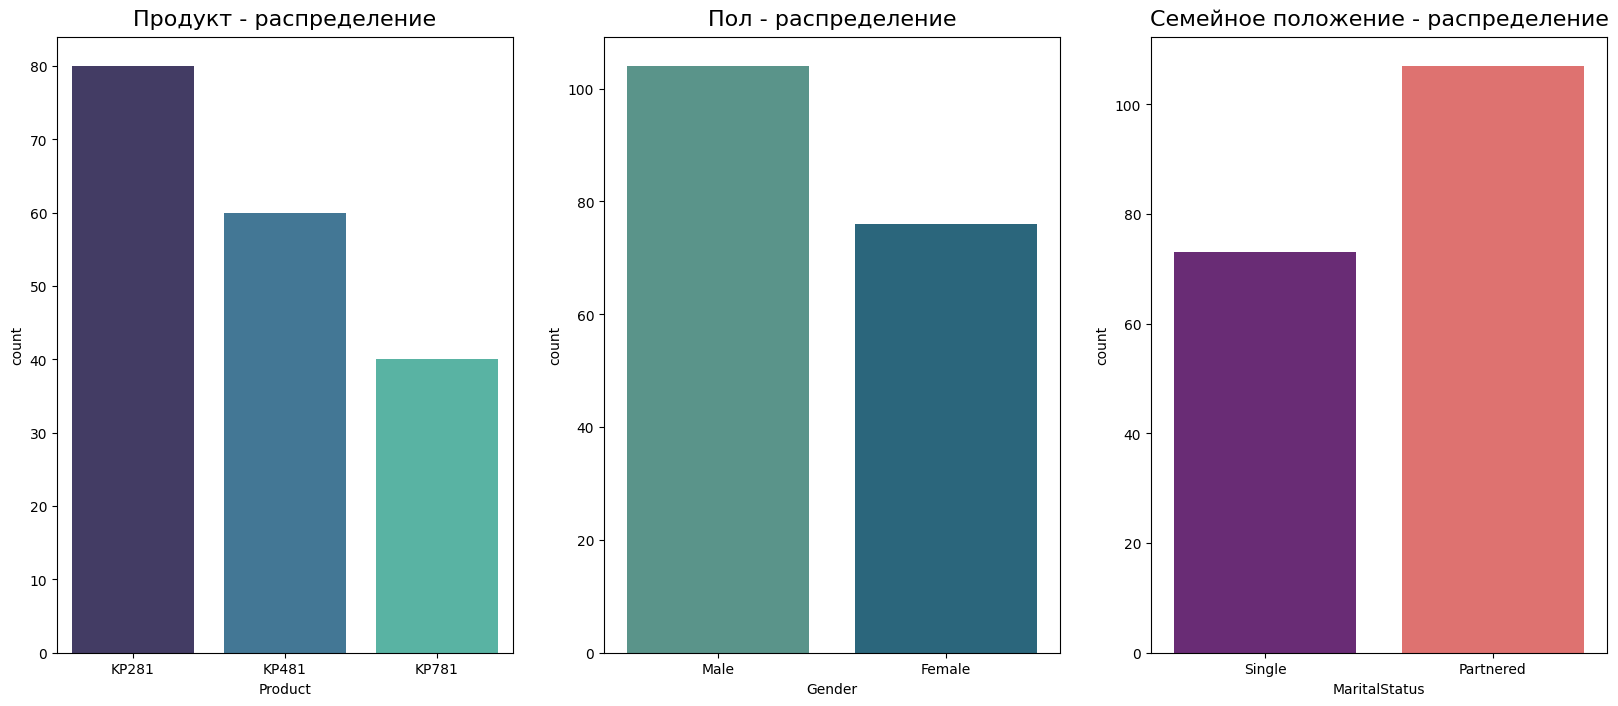

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
sns.countplot(data=aerofit, x='Product', palette="mako", ax=axs[0])
sns.countplot(data=aerofit, x = 'Gender', palette="crest", ax=axs[1])
sns.countplot(data=aerofit, x='MaritalStatus', palette="magma", ax=axs[2])

axs[0].set_title("Продукт - распределение", pad=8, fontsize=16)
axs[1].set_title("Пол - распределение", pad=8, fontsize=16)
axs[2].set_title("Семейное положение - распределение", pad=8, fontsize=16)
plt.show()

- Изделие **«KP281»** выделяется как наиболее часто покупаемый товар.
- В наборе данных **мужчин больше, чем женщин**.
- Набор данных содержит большее количество лиц, состоящих в **партнерском или семейном положении**.


/tmp/ipython-input-43-2951180261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aerofit,x='Fitness',palette="rocket")


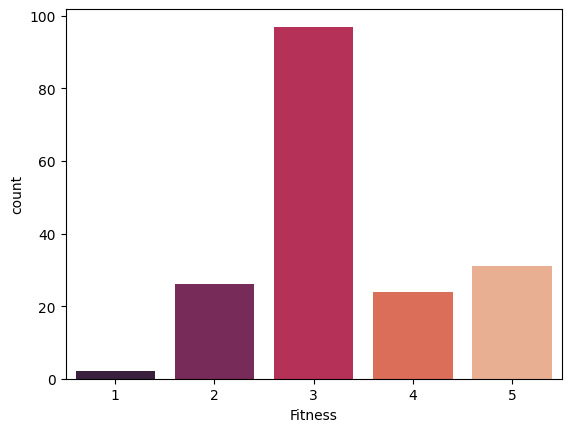

In [43]:
sns.countplot(data=aerofit,x='Fitness',palette="rocket")
plt.show()


- **Более 90 клиентов** оценили свою физическую подготовку как **"Средняя"**.
- **Отличная форма** — вторая по величине оценка, данная клиентами.

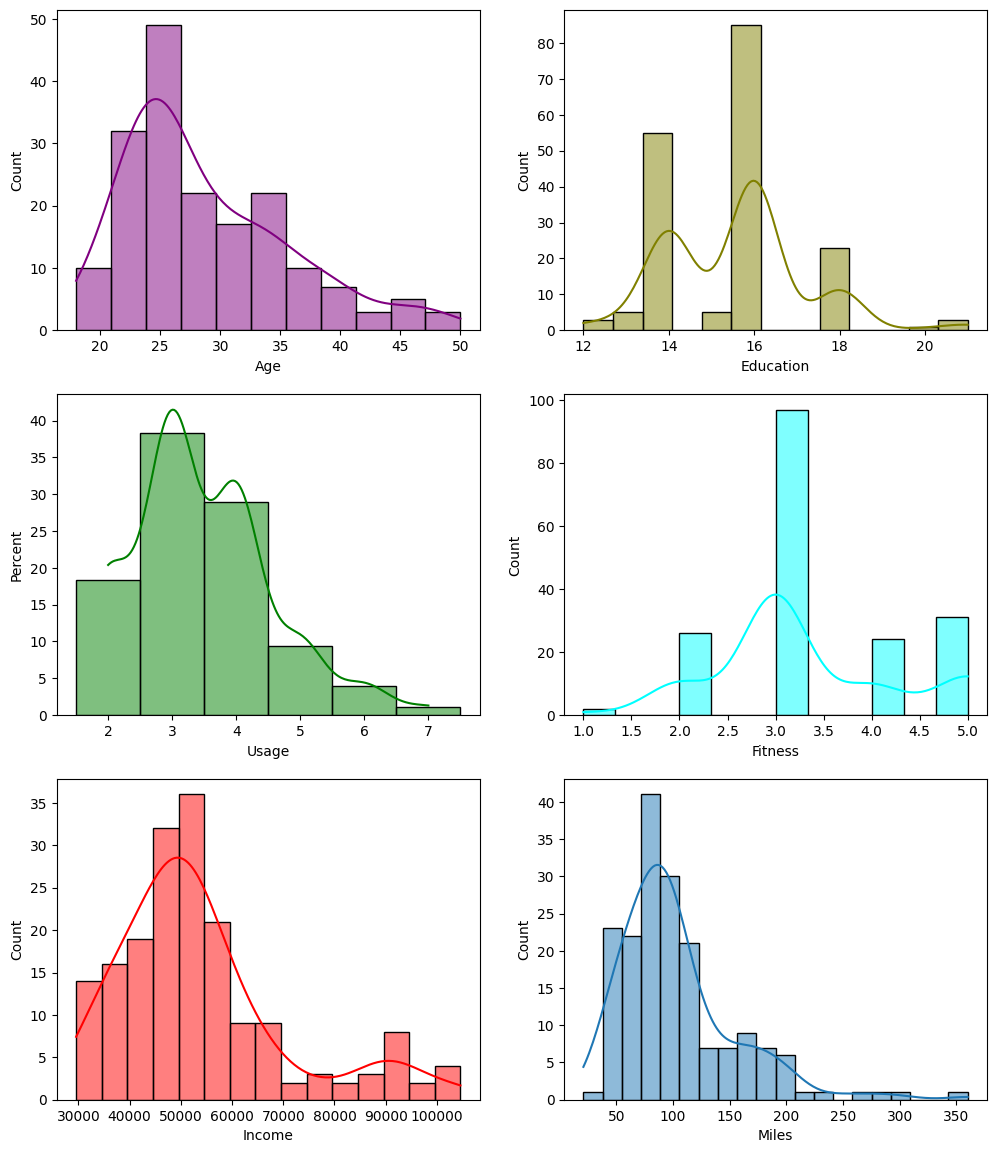

In [44]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=aerofit, x="Age",kde=True, ax=axis[0,0], color='purple')
sns.histplot(data=aerofit, x="Education", kde=True, ax=axis[0,1], color='olive')
sns.histplot(data=aerofit, x="Usage", kde=True, stat = 'percent', discrete = True, ax=axis[1,0], color='green')
sns.histplot(data=aerofit, x="Fitness", kde=True, ax=axis[1,1], color='cyan')
sns.histplot(data=aerofit, x="Income", kde=True, ax=axis[2,0], color='red')
sns.histplot(data=aerofit, x="Miles", kde=True, ax=axis[2,1])
plt.show()


- На графике выше можно наглядно увидеть, что большинство клиентов имеют 16-летнее образование, затем следуют 14-летнее и 18-летнее.

- Похоже, что большинство клиентов используют беговые дорожки через день

- Большинство клиентов зарабатывают от 35000 до 60000 долларов в год.

- У 80% клиентов годовая зарплата составляет менее 65000$.

- Большинство клиентов планируют проходить или бегать от 40 до 120 миль в неделю.


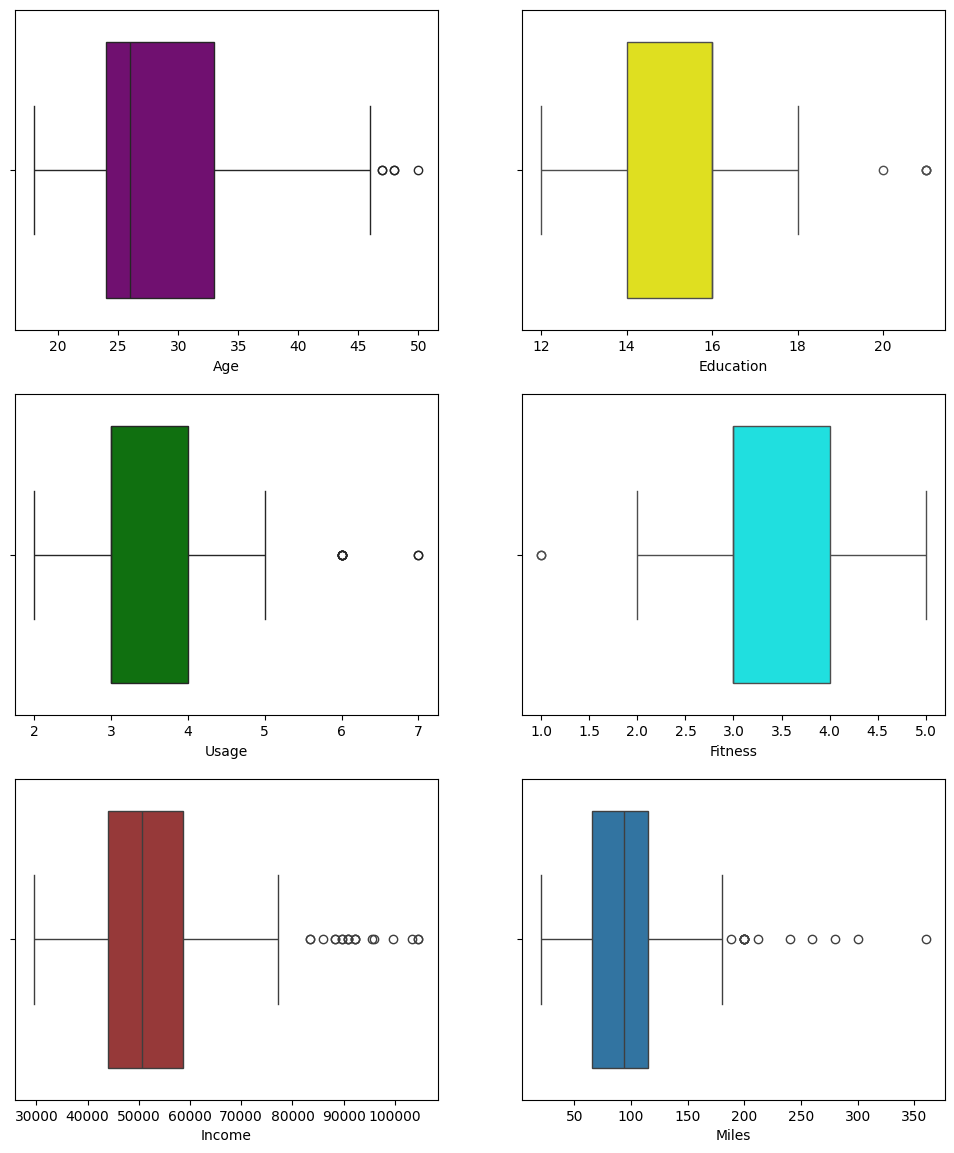

In [45]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit, x="Age", ax=axis[0,0], color='purple')
sns.boxplot(data=aerofit, x="Education", ax=axis[0,1], color='yellow')
sns.boxplot(data=aerofit, x="Usage", ax=axis[1,0], color='green')
sns.boxplot(data=aerofit, x="Fitness", ax=axis[1,1], color='cyan')
sns.boxplot(data=aerofit, x="Income",  ax=axis[2,0], color='brown')
sns.boxplot(data=aerofit, x="Miles", ax=axis[2,1])
plt.show()

- По показателям «Age» (Возраст), «Education»(Образование) и «Usage» (Использование) наблюдается очень мало отклонений.
- В то время как показатели доходов и миль демонстрируют больше отклонений.

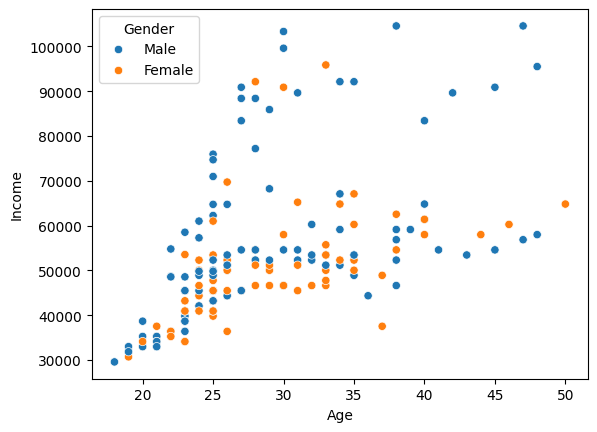

In [46]:
age_wise_income=sns.scatterplot(data=aerofit, x='Age',y='Income', hue='Gender')

## Двумерный анализ

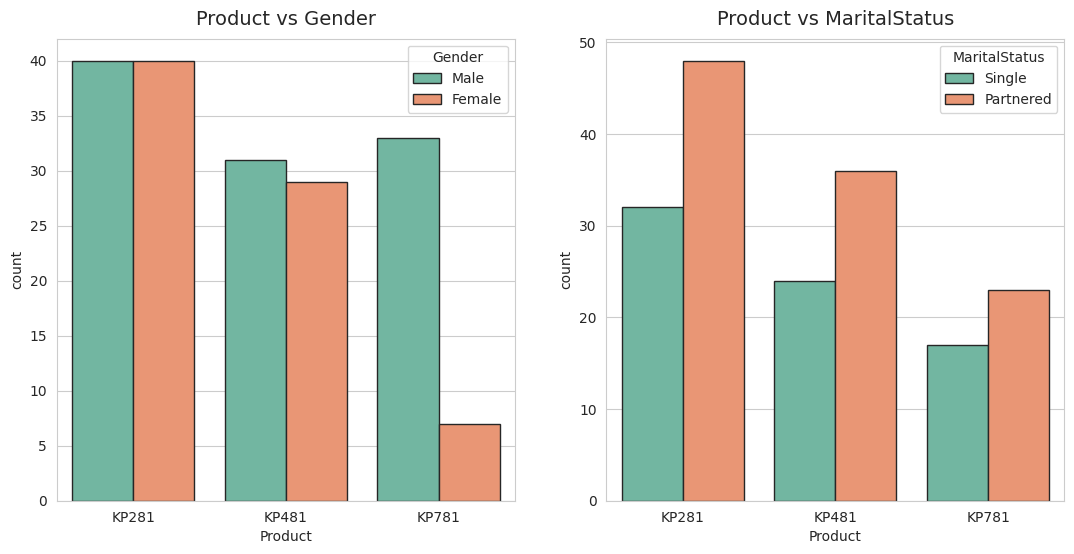

In [47]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
sns.countplot(data=aerofit, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=aerofit, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set2', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Product vs Gender**
- An equal number of males and females have bought the KP281 product, and a similar pattern is observed for the KP481 product.
- The majority of male customers have opted for the KP781 product.

**Product vs MaritalStatus**
- Customer who is Partnered, is more likely to purchase the product.

**Продукт - пол**

- Продукт KP281 приобрело равное количество мужчин и женщин, аналогичная картина наблюдается и для продукта KP481.
- Большинство покупателей-мужчин выбрали продукт KP781.

**Продукт  - Семейный Статус**

- Клиент, являющийся партнером, с большей вероятностью приобретет продукт.

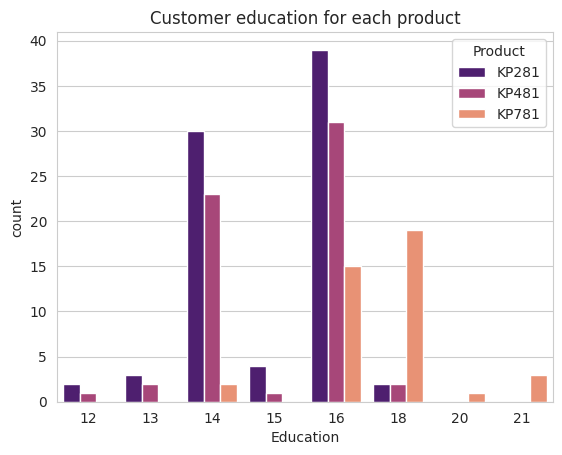

In [48]:
sns.countplot(data=aerofit, x='Education', hue='Product', palette='magma')
plt.title('Customer education for each product')
plt.show()

Клиент с показателем образования 16 предпочитает KP781.

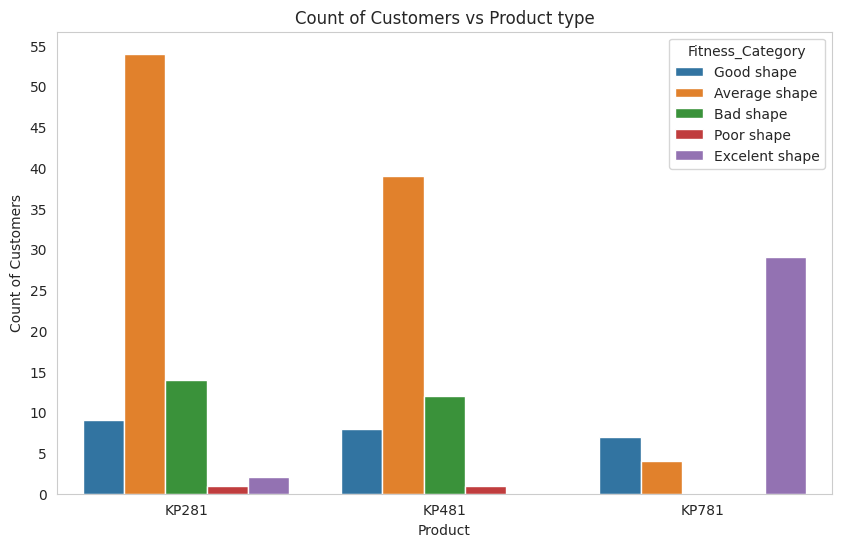

In [49]:
plt.figure(figsize = (10, 6))
plt.title("Count of Customers vs Product type")
plt.yticks(np.arange(0, 60, 5))
sns.countplot(data = aerofit2, x = 'Product', hue = 'Fitness_Category')
plt.ylabel('Count of Customers')
plt.grid(axis = 'y')
plt.show()

- Клиенты, которые оценивают свою физическую форму на 3 из 5 по шкале самооценки, с большей вероятностью вложат средства в беговые дорожки начального уровня или беговые дорожки для бегунов среднего уровня, например, KP281 и KP481 соответственно, и с меньшей вероятностью купят беговую дорожку с расширенными функциями, например, KP781.
- Беговая дорожка с расширенными функциями в основном используется людьми с высоким уровнем физической подготовки.
- Клиенты, которые оценивают свою физическую форму на 3 балла или ниже по шкале самооценки, не покупают KP781.

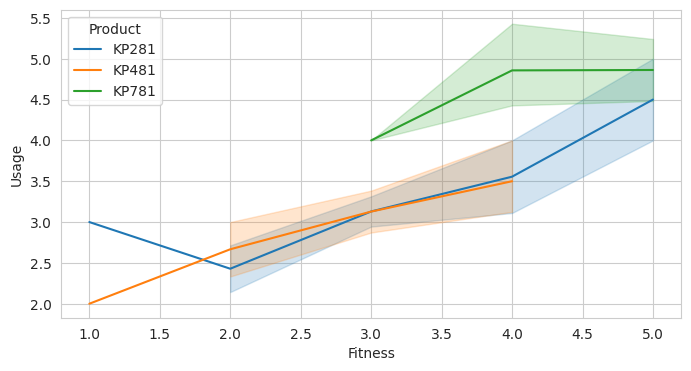

In [50]:
plt.figure(figsize = (8, 4))
sns.lineplot(data=aerofit, x='Fitness', y='Usage',hue='Product')
plt.show()

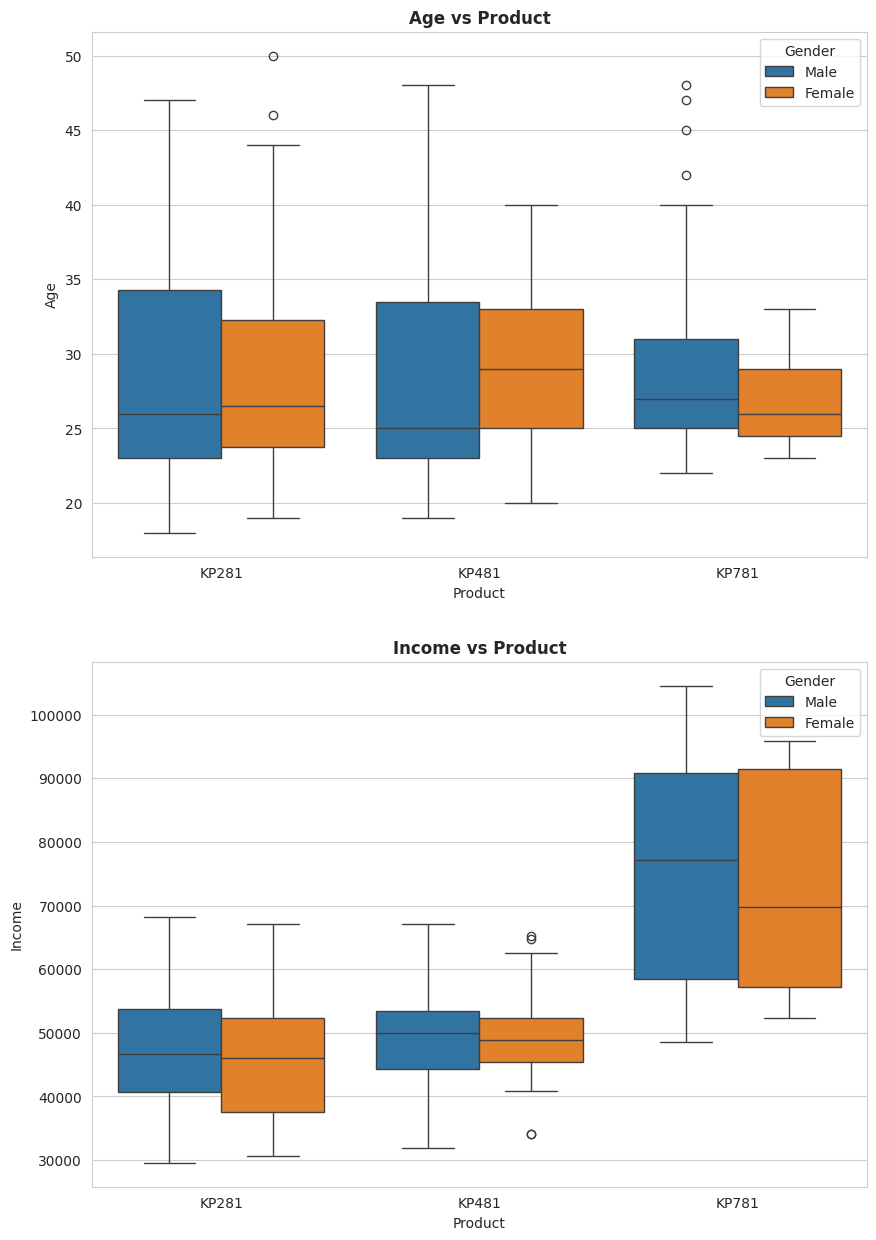

In [51]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(10,15))
sns.boxplot(data=aerofit, y='Age', x='Product', hue='Gender', ax=ax[0])
ax[0].set_title('Age vs Product', fontweight='bold')
sns.boxplot(data=aerofit, y='Income', x='Product', hue='Gender', ax=ax[1])
ax[1].set_title('Income vs Product', fontweight='bold')
plt.show()


**Возраст - продукт**

- Наблюдается значительная разница в среднем возрасте мужчин и женщин, купивших KP481.
- Для любого продукта возрастной диапазон для мужчин выше, чем для женщин. Разница в диапазоне существенна для продукта KP781.

**Доход - Продукт**

- Средний доход клиентов, купивших KP781, значительно выше, чем у клиентов, купивших два других продукта.
- Диапазон доходов клиентов, покупающих KP781, значительно выше, чем у клиентов, покупающих KP281 и KP481.

## Визуализация корреляции: тепловые карты (Heatmaps), парные графики (Pairplots)

[]

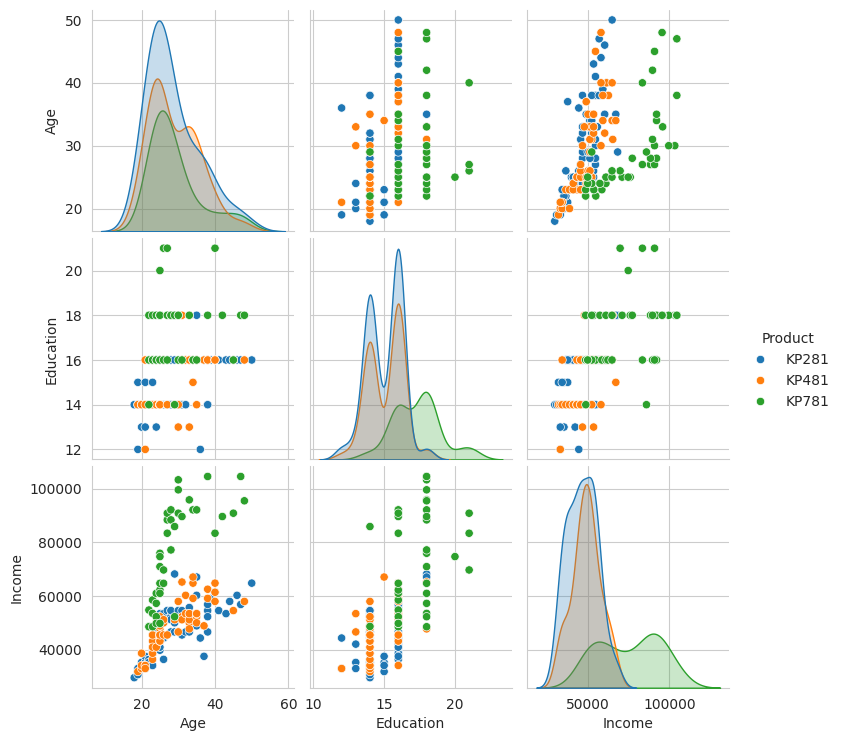

In [52]:
sns.pairplot(data = aerofit[['Product','Age','Education','Income']], hue='Product')
plt.plot()

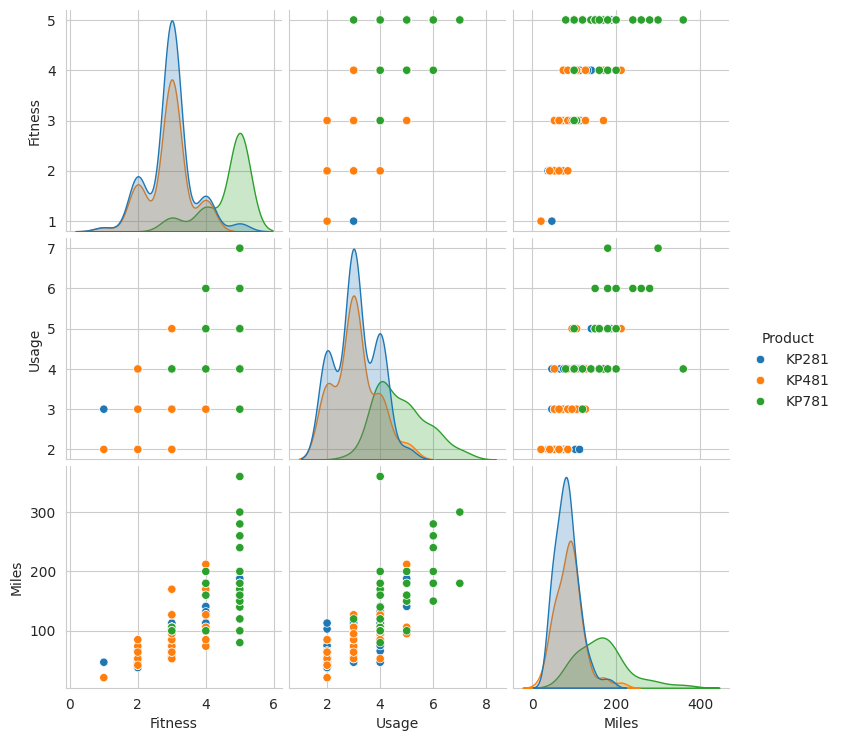

In [53]:
sns.pairplot(data=aerofit[['Fitness','Usage','Miles','Product']], hue='Product')
plt.show()

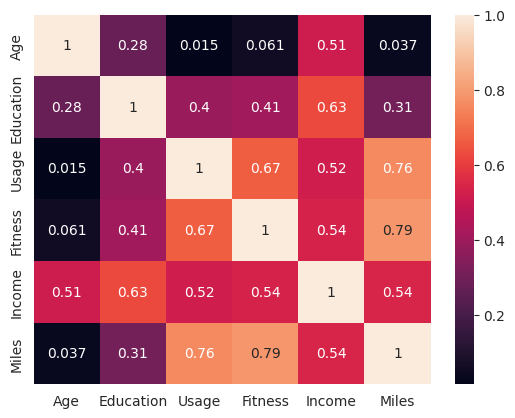

In [54]:
sns.heatmap(aerofit[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)
plt.show()


# Обнаружение отсутствующих значений и выбросов

## Отсутствующие значения

In [55]:
aerofit.isnull().any()

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False


В наборе данных нет нулевых значений.

## Обнаружение выбросов

### Обнаружение выбросов для годового дохода

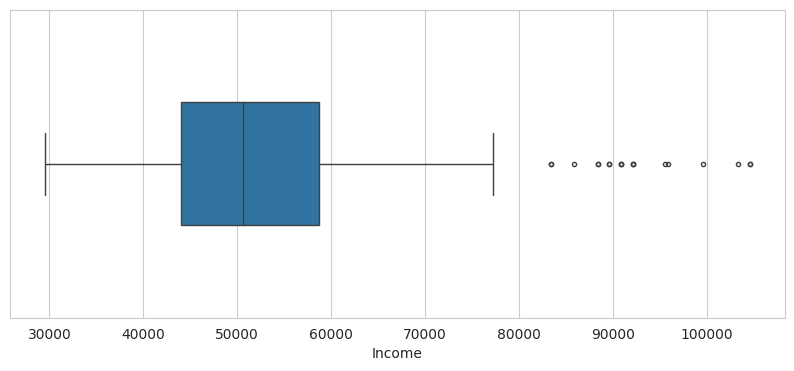

In [56]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = aerofit, x = 'Income', width = 0.4, orient = 'h',  fliersize = 3)
plt.show()

In [57]:
data=aerofit['Income']
q1=data.quantile(.25)
q3=data.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data.median())
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range:', iqr)
upper = q3 + 1.5 * iqr
print('Upper bound:',upper)
lower=q1 - 1.5*iqr
print('Lower bound:',lower)
outliers=data[(data>upper)|(data<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data[(data>upper)|(data<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  44058.75
Median :  50596.5
3rd Quartile :  58668.0
Innerquartile Range: 14609.25
Upper bound: 80581.875
Lower bound: 22144.875
outliers: [83416, 83416, 85906, 88396, 88396, 89641, 89641, 90886, 90886, 90886, 92131, 92131, 92131, 95508, 95866, 99601, 103336, 104581, 104581]
No. of outlier: 19


у нас ровно 19 выбросов в диапазоне доходов.

### Обнаружение отклонений для Миль (Miles)

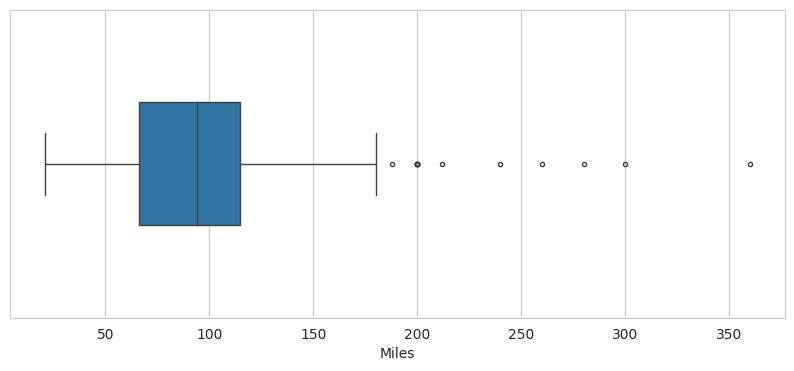

In [58]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = aerofit, x = 'Miles', width = 0.4, orient = 'h',  fliersize = 3)
plt.show()

In [59]:
data1=aerofit['Miles']
q1=data1.quantile(.25)
q3=data1.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data1.median())
print("3rd Quartile : ", q3)
iqr= q3 - q1
print('Innerquartile Range:', iqr)
upper= q3 + 1.5 * iqr
print('Upper bound:',upper)
lower= q1 - 1.5 * iqr
print('Lower bound:',lower)
outliers=data1[(data1>upper)|(data1<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data1[(data1>upper)|(data1<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  66.0
Median :  94.0
3rd Quartile :  114.75
Innerquartile Range: 48.75
Upper bound: 187.875
Lower bound: -7.125
outliers: [188, 200, 200, 200, 200, 200, 200, 212, 240, 260, 280, 300, 360]
No. of outlier: 13




- У нас есть 13 выбросов в диапазоне миль
- В то время как показатели доходов и миль демонстрируют больше отклонений.
- По показателям «Возраст», «Образование» и «Использование» наблюдается очень мало отклонений.

### обнаружение отклонений в возрасте мужчин, купивших KP781

In [60]:
#поскольку мы видим некоторые отклонения на диаграмме «Возраст - продукт», поэтому здесь обнаружено нет. выбросов

data2=aerofit.loc[(aerofit['Product']=='KP781')&(aerofit['Gender']=='Male'), 'Age']
q1=data2.quantile(.25)
q3=data2.quantile(.75)
print("1st Quartile : ", q1)
print('Median : ', data2.median())
print("3rd Quartile : ", q3)
iqr= q3 - q1
print('Innerquartile Range:', iqr)
upper= q3 + 1.5 * iqr
print('Upper bound:',upper)
lower= q1 - 1.5 * iqr
print('Lower bound:',lower)
outliers=data2[(data2>upper)|(data2<lower)]
print('outliers:', sorted(outliers))
outliers_count=len(data2[(data2>upper)|(data2<lower)])
print('No. of outlier:', outliers_count)

1st Quartile :  25.0
Median :  27.0
3rd Quartile :  31.0
Innerquartile Range: 6.0
Upper bound: 40.0
Lower bound: 16.0
outliers: [42, 45, 47, 48]
No. of outlier: 4


У нас есть ровно 4 выброса в данных о возрасте мужчин, купивших беговую дорожку KP781.

## Бизнес-анализ на основе неграфического и визуального анализа

### Предельные вероятности

In [61]:
np.round(((pd.crosstab(aerofit.Product, aerofit.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


- P(мужчины): 57,77 %
- P(женщины): 42,22 %
- 44,44% клиентов приобрели продукт KP281.
- 33,33% клиентов приобрели продукт KP481.
- 22,22% клиентов купили продукт KP781

### Условные вероятности


 **Вероятность покупки клиентом определенного товара, если клиент принадлежит к определенному полу.**

In [62]:
products= aerofit['Product'].unique()
genders= aerofit['Gender'].unique()
for i in products:
    for j in genders:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['Gender']==j)])/ len(aerofit[aerofit['Gender']==j])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(i, j, prob))
        print()

P(KP281/Male): 38.46%

P(KP281/Female): 52.63%

P(KP481/Male): 29.81%

P(KP481/Female): 38.16%

P(KP781/Male): 31.73%

P(KP781/Female): 9.21%



 **Вероятность того, что покупатель будет иметь определенный пол при покупке определенного товара.**

In [63]:
for i in products:
    for j in genders:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['Gender']==j)])/ len(aerofit[aerofit['Product']==i])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(j, i, prob))
        print()

P(Male/KP281): 50.0%

P(Female/KP281): 50.0%

P(Male/KP481): 51.67%

P(Female/KP481): 48.33%

P(Male/KP781): 82.5%

P(Female/KP781): 17.5%



**Вероятность покупки клиентом определенного продукта, если клиент принадлежит к определенному семейному положению.**

In [64]:
products= aerofit['Product'].unique()
status= aerofit['MaritalStatus'].unique()
for i in products:
    for j in status:
        prob=len(aerofit[(aerofit["Product"]==i) & (aerofit['MaritalStatus']==j)])/ len(aerofit[aerofit['MaritalStatus']==j])
        prob=np.round(prob*100, 2)
        print('P({}/{}): {}%'.format(i, j, prob))
        print()

P(KP281/Single): 43.84%

P(KP281/Partnered): 44.86%

P(KP481/Single): 32.88%

P(KP481/Partnered): 33.64%

P(KP781/Single): 23.29%

P(KP781/Partnered): 21.5%



## Профилирование клиентов — категоризация пользователей.



### Профиль клиента KP281
- Клиенты, которые оценивают свою физическую форму на 3 из 5 по шкале самооценки, с большей вероятностью будут инвестировать в.
- Использование (Usage) менее 4 дней в неделю.
- Большинство клиентов, купивших продукт, оценили свою форму как среднюю.
- Диапазон доходов от 39 тыс. до 53 тыс. предпочли этот продукт.
- Клиенты с низкой физической подготовкой или низким годовым доходом.
- Вероятность увеличивается с 44,44% до 58,7%, если клиент — женщина и состоит в партнерстве.
- Этот продукт предпочитают как начинающие клиенты, так и покупатели постарше.
- Наиболее предпочтительны клиенты с образованием до 16 лет.
- Клиенты, чей пробег составляет менее 120 миль в неделю

### Профиль клиента KP481
- Это продукт среднего уровня.
- Использование менее 4 дней в неделю.
- Уровень физической подготовки пользователей этого продукта варьируется от плохого до среднего в зависимости от способа его использования.
- Среднее расстояние, пройденное с помощью этого продукта, составляет от 70 до 130 миль в неделю.
- Клиенты предпочитают этот продукт в основном для преодоления больших расстояний, а не для фитнеса.
- Клиенты с низким и средним доходом.
- Средний доход клиента, покупающего KP481, составляет 49 тыс.
- Клиенты-мужчины, которые состоят в партнерских отношениях, предпочитают клиентов-мужчин, которые не состоят в отношениях.
- Профиль клиентов у него почти такой же, как у KP281, но у KP281 более широкий круг клиентов, чем у KP481.

### Профиль клиента KP781
- Из них 82,5% — мужчины, остальные — женщины.
- Среди всех женщин-покупателей только 9,21 % покупают KP781.
- Средний пробег/пробег клиента составляет от 120 до 200 и более миль в неделю
- У 90 % из них фитнес-шкала оценивалась на уровне 4 или 5. Только у 10 % из них была средняя форма тела.
- Клиенты женского пола, пробегающие в среднем 180 миль (интенсивные упражнения), используют продукт KP781, что выше среднего показателя среди мужчин, использующих тот же продукт.
- Использование более 4 дней в неделю.
- Клиенты, получившие образование более 16 лет.
- у клиента годовой доход в диапазоне '> 80 тыс.' составляет 100,0%
- Этот продукт предпочитают клиенты, у которых высокая корреляция между образованием и доходом.

## Инсайты
- Продукт KP281 приносит самый большой доход, далее идут KP481 и KP781 соответственно.
- Высокообразованные клиенты предпочитают продукт KP781; они могли бы быть более осведомлены о типичных функциях продукта и его использовании.
продукт KP781 используется чаще по сравнению с другими продуктами KP281 и KP481
- Большинство клиентов находятся в возрастной группе 22-33 года.
- ~60-40% распределение покупателей продукции среди мужчин и женщин
Большинство покупателей тратят 14, 16, 18 лет на свое образование.
- ~60-40% распределение покупателей индивидуальной и партнерской продукции
- Большинство пользователей используют беговую дорожку 3-4 раза в неделю.
- Среди всех клиентов, купивших KP281, 96,25 % имели оценку физической подготовки 2, 3 или 4. Только 2,5 % из них имели отличную форму тела.
- Большинство пользователей оценивают себя как средние с точки зрения уровня своей физической подготовки.
- Большинство пользователей зарабатывают от 35000 до 60000 долларов в год.
- Большинство пользователей устанавливают целевое расстояние, которое они, как ожидается, пройдут/пробегут, в диапазоне от 53 до 132 миль.


# Рекомендации

- Лучший, высококачественный, премиальный продукт для высокообразованных, высокодоходных и активных клиентов, позволяющий увеличить доход.
- Поскольку KP781, премиальный продукт, пользуется популярностью у мужчин с высоким доходом и пользуется им чаще, мы можем предлагать этой демографической группе аналогичные продукты, а также знакомить их с предстоящими премиальными предложениями.
- Женщины, которые предпочитают тренажеры, здесь очень малы. Поэтому нам следует запустить маркетинговую кампанию, чтобы побудить женщин больше заниматься спортом
- Поскольку KP781 предлагает больше функций и возможностей, беговую дорожку следует рекламировать для профессионалов и спортсменов. Продукт KP781 следует продвигать с помощью влиятельных лиц и других международных спортсменов.
- Поскольку KP281 и KP481 также приносят значительный доход и пользуются популярностью у молодых и обучающихся людей, дополнительные функции и специальные скидки могут способствовать росту продаж.
- Поскольку KP281 является самым продаваемым продуктом, мы можем усилить продвижение продукции KP481 и потенциально ввести бесплатную опцию EMI для стимулирования продаж.
- Необходимо провести исследование для расширения рынка сбыта для людей старше 50 лет с учетом плюсов и минусов для здоровья.
- Оказывать поддержку клиентам и рекомендовать пользователям обновлять версии более низкого уровня до версий следующего уровня после постоянного использования.
- KP781 можно рекомендовать женщинам, которые активно занимаются спортом, а также он прост в использовании, поскольку этот тип является продвинутым.